# Estimación de Estadía Hospitalaria en Guatemala: Limpieza y Exploración de Datos

**Authors:** [Melissa Perez](https://github.com/MelissaPerez09), [Adrian Flores](https://github.com/adrianRFlores), [Andrea Ramirez](https://github.com/Andrea-gt), [Daniel Valdez](https://github.com/Danval-003), [Sebastián Juárez](https://github.com/Danval-003)

**Description:** En este notebook se presenta el análisis exploratorio de un modelo predictivo diseñado para estimar la duración de la estadía hospitalaria de pacientes en instituciones de Guatemala. El conjunto de datos utilizado consta de 2,499,795 observaciones recopiladas durante un período de diez años, desde 2012 hasta 2022. Estos datos fueron obtenidos del Instituto Nacional de Estadística (INE) de Guatemala a través de su página oficial. Este trabajo se centra en la limpieza de datos y la exploración detallada para identificar patrones y tendencias relevantes que puedan contribuir a la mejora de la gestión hospitalaria en lo que respecta a suministros médicos.

## Importación de Librerías

In [47]:
# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Pretty printing of data structures
import pprint

# Standard libraries
import warnings
warnings.filterwarnings('ignore')

# ===== ===== Reproducibility Seed ===== =====
# Set a fixed seed for the random number generator for reproducibility
np.random.seed(24)  # You can use any integer value as the seed

# Set matplotlib inline
%matplotlib inline

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)

# Define custom color palette
palette = sns.color_palette("viridis", 12)

## Descripción de Datos

Los datos utilizados en este proyecto fueron obtenidos del Instituto Nacional de Estadística (INE) en Guatemala, a partir de su página oficial. El objetivo de este proyecto es desarrollar un modelo predictivo de valor. Se espera poder brindar ayuda y contribuir al mejoramiento de la calidad de vida de la población. Este proyecto es relevante debido a su enfoque en la salud, ya que se centra en datos relacionados con la estancia hospitalaria y el tratamiento médico. Los datos abarcan un período de diez años, desde 2012 hasta 2022, lo que proporciona un amplio conjunto de datos históricos para análisis y modelado.

| Nombre               | Tipo de Variable | Descripción                                                                        |
|----------------------|------------------|------------------------------------------------------------------------------------|
| AÑO                  | Numérico         | El período de tiempo al que corresponde la observación.                            |
| MES                  | Categórica       | El mes al que corresponde la observación.                                          |
| DIASESTANCIA         | Numérico         | La cantidad de días que una persona pasa en el hospital.                           |
| SEXO                 | Categórica       | El sexo del paciente.                                                              |
| PPERTENENCIA         | Categórica       | El grupo étnico al que pertenece el paciente.                                      |
| EDAD                 | Numérico         | La edad del paciente.                                                              |
| PERIODOEDA           | Categórica       | El tipo de unidad de medida de la edad (años, días, meses, etc.).                  |
| DEPTORESIDEN         | Categórica       | El departamento en Guatemala donde se encuentra el hospital.                       |
| MUNIRESIDEN          | Categórica       | El municipio en Guatemala donde se encuentra el hospital.                          |
| CAUFIN               | Categórica       | La causa de atención médica que motivó la estancia en el hospital.                 |
| CONDIEGRES           | Categórica       | La condición en la que el paciente es dado de alta o sale del hospital.            |
| TRATARECIB           | Categórica       | El tratamiento médico recibido por el paciente durante su estancia en el hospital. |

### Importación y Unión de Datos

In [48]:
# Initialize an empty list to store DataFrames
dataframes = []

# Iterate over the years from 2012 to 2021
for year in range(2012, 2022):
    # Read each .sav file corresponding to the year
    df = pd.read_spss(f"data/{year}.sav")
    
    # Check if the DataFrame contains a column named "GRUPETNICO"
    if "GRUPETNICO" in df.columns:
        # Rename the "GRUPETNICO" column to "PPERTENENCIA" for consistency
        df.rename(columns={"GRUPETNICO": "PPERTENENCIA"}, inplace=True)
    
    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames in the list into one DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the merged DataFrame
merged_df.head()

,AÑO,MES,DIASESTANCIA,SEXO,PPERTENENCIA,EDAD,PERIODOEDA,DEPTORESIDEN,MUNIRESIDEN,CAUFIN,CONDIEGRES,TRATARECIB
0,2012.0,Enero,1.0,Hombre,Ignorado,0.0,Días,Guatemala,San Juan Sacatepéquez,P95X,Vivo,Médico
1,2012.0,Febrero,1.0,Mujer,Ignorado,0.0,Días,Zacapa,Zacapa,P95X,Vivo,Médico
2,2012.0,Enero,2.0,Mujer,No indígena,0.0,Días,Quetzaltenango,Quetzaltenango,P95X,Vivo,Médico
3,2012.0,Abril,2.0,Mujer,No indígena,0.0,Días,Quetzaltenango,Quetzaltenango,P95X,Vivo,Médico
4,2012.0,Junio,2.0,Mujer,No indígena,0.0,Días,Quetzaltenango,Quetzaltenango,P95X,Vivo,Médico


## Análisis Exploratorio (Primera Iteración)

El propósito de este análisis exploratorio es abordar una serie de interrogantes clave que orientarán la construcción de un modelo predictivo para estimar la duración de la estadía hospitalaria en función de la enfermedad presentada por el paciente. El primer paso consiste en evaluar la calidad de los datos proporcionados por el Instituto Nacional de Estadística de Guatemala (INE). Es fundamental verificar la integridad de los datos, identificando posibles problemas como la presencia de valores nulos, datos inconsistentes o variaciones significativas entre diferentes grupos de pacientes.

In [49]:
# Get the number of rows in the merged DataFrame
rows_num = merged_df.shape[0]

# Print the number of records in the DataFrame
print("El conjunto de datos tiene", rows_num, "registros.")

El conjunto de datos tiene 2305450 registros.


### Proceso de Limpieza

#### Modificación de las Etiquetas de las Variables

In [50]:
# Convert column names to lowercase using the map function
merged_df.columns = map(str.lower, merged_df.columns)

# Rename columns with specified mappings using the rename function
merged_df.rename(columns={
    "año":          "periodo",  # Rename "año" column to "periodo"
    "diasestancia": "dias_estancia",  # Rename "diasestancia" column to "dias_estancia"
    "ppertenencia": "grupo_etnico",  # Rename "ppertenencia" column to "grupo_etnico"
    "periodoeda":   "tipo_edad",  # Rename "periodoeda" column to "tipo_edad"
    "deptoresiden": "departamento",  # Rename "deptoresiden" column to "departamento"
    "muniresiden":  "municipio",  # Rename "muniresiden" column to "municipio"
    "caufin":       "causa_atencion",  # Rename "caufin" column to "causa_atencion"
    "condiegres":   "condicion_egreso",  # Rename "condiegres" column to "condicion_egreso"
    "tratarecib":   "tratamiento_recibido"  # Rename "tratarecib" column to "tratamiento_recibido"
}, inplace=True)

# Print the column names after renaming
pprint.pprint(merged_df.columns)

Index(['periodo', 'mes', 'dias_estancia', 'sexo', 'grupo_etnico', 'edad',
       'tipo_edad', 'departamento', 'municipio', 'causa_atencion',
       'condicion_egreso', 'tratamiento_recibido'],
      dtype='object')


In [51]:
print(merged_df.dtypes)

periodo                  float64
mes                     category
dias_estancia             object
sexo                    category
grupo_etnico              object
edad                      object
tipo_edad               category
departamento            category
municipio                 object
causa_atencion            object
condicion_egreso          object
tratamiento_recibido      object
dtype: object


#### Top 10 Valores Más Frecuentes para Cada Columna

In [52]:
# See what are the 10 most frequent values for each of the dataframe columns
for column in merged_df.columns:
    frequency_values = merged_df[column].value_counts().head(10)
    print("Top 10 most frequent values for column '{}':".format(column))
    for index, (value, frequency) in enumerate(frequency_values.items(), start=1):
        print("{:<5} {:<30} {:<10}".format(index, value, frequency))
    print("\n===============================================")

Top 10 most frequent values for column 'periodo':
1     2019.0                         286085    
2     2020.0                         261295    
3     2016.0                         250211    
4     2018.0                         238376    
5     2015.0                         234922    
6     2021.0                         228471    
7     2017.0                         223281    
8     2014.0                         207839    
9     2013.0                         189555    
10    2012.0                         185415    

Top 10 most frequent values for column 'mes':
1     Mayo                           202504    
2     Julio                          198909    
3     Marzo                          198792    
4     Agosto                         198137    
5     Octubre                        194758    
6     Septiembre                     194122    
7     Noviembre                      189288    
8     Junio                          188916    
9     Enero                          18

#### Top 10 Departamentos por Frecuencia

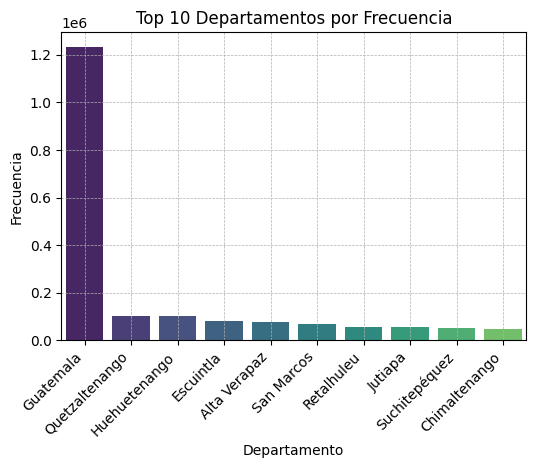

In [53]:
values = [1233424, 102745, 100148, 81157, 78064, 69629, 54887, 53593, 53443, 46982]
labels = ['Guatemala', 'Quetzaltenango', 'Huehuetenango', 'Escuintla', 'Alta Verapaz', 'San Marcos', 'Retalhuleu', 'Jutiapa', 'Suchitepéquez', 'Chimaltenango']

# Create bar plot using seaborn
sns.barplot(x=labels, y=values, palette=palette)

# Adding labels and title
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.title('Top 10 Departamentos por Frecuencia')

# Rotating x labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

#### Top 10 Causas de Atención por Frecuencia

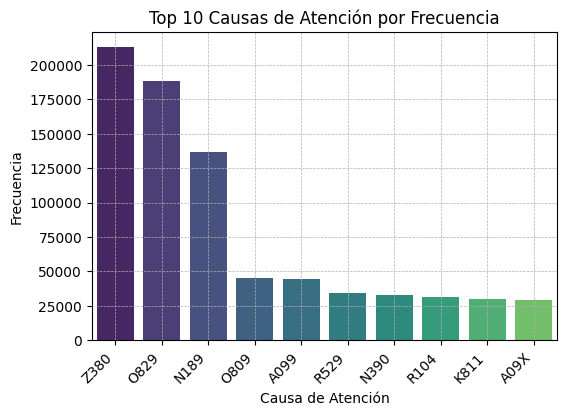

In [54]:
labels = ['Z380', 'O829', 'N189', 'O809', 'A099', 'R529', 'N390', 'R104', 'K811', 'A09X']
values = [212765, 188247, 136627, 45475, 44565, 34286, 33255, 31515, 29839, 29315]

# Create bar plot using seaborn
sns.barplot(x=labels, y=values, palette=palette)

# Adding labels and title
plt.xlabel('Causa de Atención')
plt.ylabel('Frecuencia')
plt.title('Top 10 Causas de Atención por Frecuencia')

# Rotating x labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

#### Análisis de Data Faltante

In [55]:
# Numeric conversions
# Convert "dias_estancia" column to numeric, coerce errors to NaN
merged_df["dias_estancia"] = pd.to_numeric(merged_df["dias_estancia"], errors="coerce")
# Convert "edad" column to numeric, coerce errors to NaN
merged_df["edad"] = pd.to_numeric(merged_df["edad"], errors="coerce")  
# Replace ages greater than 9999 with NaN
merged_df.loc[merged_df["edad"] > 9999, "edad"] = np.nan

# Category conversions
# Replace "Ignorado" values in "sexo" column with NaN
merged_df["sexo"].replace("Ignorado", np.nan, inplace=True)
# Replace "Ignorado" values in "tipo_edad" column with NaN
merged_df["tipo_edad"].replace("Ignorado", np.nan, inplace=True)
# Replace "Ignorado" values in "departamento" column with NaN
merged_df["departamento"].replace("Ignorado", np.nan, inplace=True)
# Replace "Ignorado" values in "municipio" column with NaN
merged_df["municipio"].replace("Ignorado", np.nan, inplace=True)
# Replace "Ignorado" values in "condicion_egreso" column with NaN
merged_df["condicion_egreso"].replace("Ignorado", np.nan, inplace=True)
# Replace "Ignorado" values in "tratamiento_recibido" column with NaN
merged_df["tratamiento_recibido"].replace("Ignorado", np.nan, inplace=True)

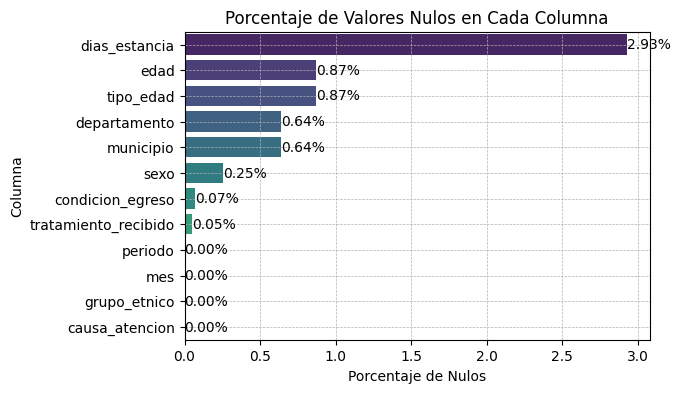

In [56]:
# Calculate the percentage of null values in each column
null_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100

# Sort the null_percentage Series from highest to lowest
null_percentage_sorted = null_percentage.sort_values(ascending=False)

# Create a horizontal bar chart
ax = sns.barplot(x=null_percentage_sorted.values, y=null_percentage_sorted.index, hue=null_percentage_sorted.index, dodge=False, palette=palette)

# Add percentage in each bar
for bar in ax.patches:
    width = bar.get_width()
    ax.text(width,       # X coordinate of text
            bar.get_y() + bar.get_height() / 2,  # Y coordinate of text
            '{:.2f}%'.format(width),  # Text to display (formatted to two decimal places)
            ha='left',  # Horizontal alignment
            va='center',  # Vertical alignment
            color='black',  # Text color
            fontsize=10)  # Font size

plt.xlabel("Porcentaje de Nulos")
plt.ylabel("Columna")
plt.title("Porcentaje de Valores Nulos en Cada Columna")

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

plt.show()

##### Modificación de Tipo de Datos de Columnas

In [57]:
# Fix types
merged_df["periodo"]                = merged_df["periodo"].astype(int)
merged_df["dias_estancia"]          = merged_df["dias_estancia"].astype(float)
merged_df["grupo_etnico"]           = merged_df["grupo_etnico"].astype("category")
merged_df["municipio"]              = merged_df["municipio"].astype("category")
merged_df["causa_atencion"]         = merged_df["causa_atencion"].astype("category")
merged_df["condicion_egreso"]       = merged_df["condicion_egreso"].astype("category")
merged_df["tratamiento_recibido"]   = merged_df["tratamiento_recibido"].astype("category")

merged_df.dtypes

periodo                    int64
mes                     category
dias_estancia            float64
sexo                    category
grupo_etnico            category
edad                     float64
tipo_edad               category
departamento            category
municipio               category
causa_atencion          category
condicion_egreso        category
tratamiento_recibido    category
dtype: object

#### Pre-Ingeniería de Características

In [58]:
frequency_values = merged_df["tipo_edad"].value_counts().head(10)
frequency_values

tipo_edad
Años     2033702
Días      218567
Meses      33128
Name: count, dtype: int64

In [59]:
# Filter observations where the type of age is in days
observations_age_days = merged_df[merged_df["tipo_edad"] == "Días"]

# Calculate the frequency of stay days
frequency_stay_days = observations_age_days["dias_estancia"].value_counts().head(10)

print("Frequency of values in the 'dias_estancia' column when 'tipo_edad' is 'Días':")
print(frequency_stay_days)

Frequency of values in the 'dias_estancia' column when 'tipo_edad' is 'Días':
dias_estancia
2.0     113546
1.0      79246
3.0      18343
4.0       2793
5.0        975
6.0        483
7.0        354
9.0        283
8.0        227
10.0       112
Name: count, dtype: int64


In [60]:
# Calculate the frequency of cause of attention when the type of age is in days
frequency_cause_stay_days = observations_age_days["causa_atencion"].value_counts().head(10)
print("Frequency of values in the 'causa_atencion' column when 'tipo_edad' is 'Días':")
frequency_cause_stay_days

Frequency of values in the 'causa_atencion' column when 'tipo_edad' is 'Días':


causa_atencion
Z380    205781
P369      2840
P599      1416
P239      1013
P073       747
Z383       455
P95X       335
P229       220
Z001       220
J180       220
Name: count, dtype: int64

La mayoría de las observaciones, que tienen días como tipo de edad, son recién nacidos que tuvieron un parto dentro del hospital. Los recién nacidos, en su mayoría, no pasan más de dos días dentro del hospital.

In [61]:
def calculate_correct_age(row):
    if pd.isnull(row["edad"]):
        return None
    elif row["tipo_edad"] == "Años":
        return row["edad"]
    elif row["tipo_edad"] == "Días":
        return row["edad"] / 365
    elif row["tipo_edad"] == "Meses":
        return row["edad"] / 12
    #  Handle cases where type of age is not specified correctly or is null
    else:
        return None  #

# Apply the function to create a new column "correct_age"
merged_df["edad_correcta"] = merged_df.apply(calculate_correct_age, axis=1)

In [62]:
# Group by 'condicion_egreso' and calculate the mean of 'dias_estancia'
mean_muerto = merged_df[merged_df['condicion_egreso'] == 'Muerto']['dias_estancia'].mean()
mean_vivo = merged_df[merged_df['condicion_egreso'] == 'Vivo']['dias_estancia'].mean()

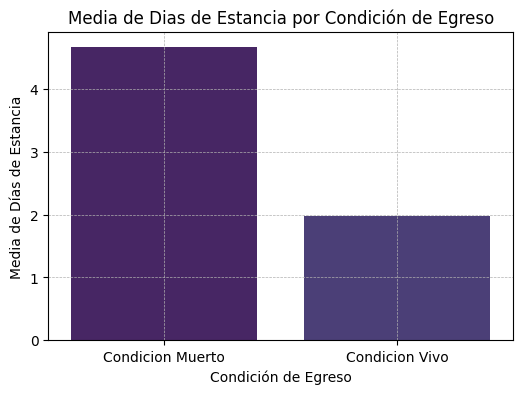

In [63]:
# Sample data
labels = ['Condicion Muerto', 'Condicion Vivo']
means = [mean_muerto, mean_vivo]

# Create bar plot using seaborn
sns.barplot(x=labels, y=means, palette=palette)

# Adding labels and title
plt.xlabel('Condición de Egreso')
plt.ylabel('Media de Días de Estancia')
plt.title('Media de Dias de Estancia por Condición de Egreso')

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

In [64]:
# Remove rows where the 'condicion_egreso' column value is 'Muerto'
merged_df = merged_df[merged_df['condicion_egreso'] != 'Muerto']

# Drop the 'condicion_egreso' column from the DataFrame
merged_df = merged_df.drop(columns=['condicion_egreso'])

#### Evaluación de Datos Atípicos

Es fundamental evaluar los datos atípicos dentro de un conjunto de datos, especialmente cuando se está construyendo un modelo predictivo. Los datos atípicos pueden tener un impacto significativo en la precisión y robustez de tu modelo, disminuyendo la capacidad para generalizar nuevos datos. 

Los datos atípicos pueden distorsionar las estadísticas y afectar negativamente el rendimiento del modelo. Por ejemplo, si un número de pacientes tiene una estancia extremadamente larga en comparación con el resto de los datos, el modelo puede verse sesgado hacia la sobreestimación de la estancia hospitalaria para todos los pacientes.

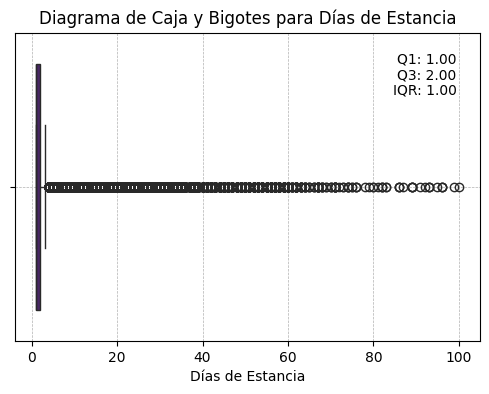

In [65]:
# Calculate quartiles
# Calculate the first quartile (Q1)
Q1 = merged_df["dias_estancia"].quantile(0.25)
# Calculate the third quartile (Q3)
Q3 = merged_df["dias_estancia"].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Create the box and whisker plot with quartiles
sns.boxplot(x="dias_estancia", data=merged_df, palette=palette)
plt.title("Diagrama de Caja y Bigotes para Días de Estancia")
plt.xlabel("Días de Estancia")

# Add quartile information as text annotations
plt.text(0.95, 0.9, f"Q1: {Q1:.2f}", transform=plt.gca().transAxes, ha="right")
plt.text(0.95, 0.8, f"IQR: {IQR:.2f}", transform=plt.gca().transAxes, ha="right")
plt.text(0.95, 0.85, f"Q3: {Q3:.2f}", transform=plt.gca().transAxes, ha="right")

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

plt.show()

In [66]:
# Define the limits to determine outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = merged_df[(merged_df["dias_estancia"] < lower_limit) | (merged_df["dias_estancia"] > upper_limit)]
num_outliers = len(outliers)

# Calculate the percentage of outliers
percentage_outliers = (num_outliers / len(merged_df)) * 100

print("Porcentaje de datos atípicos en 'dias_estancia':", percentage_outliers)

Porcentaje de datos atípicos en 'dias_estancia': 7.703550297404603


In [67]:
merged_df['dias_estancia'] = merged_df['dias_estancia'].apply(lambda x: min(x, 60))

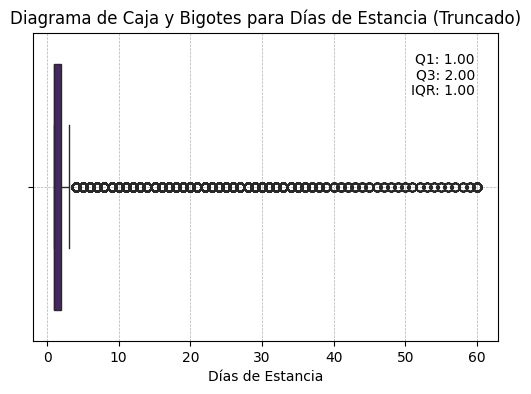

In [68]:
# Calculate quartiles
# Calculate the first quartile (Q1)
Q1 = merged_df["dias_estancia"].quantile(0.25)
# Calculate the third quartile (Q3)
Q3 = merged_df["dias_estancia"].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Create the box and whisker plot with quartiles
sns.boxplot(x="dias_estancia", data=merged_df, palette=palette)
plt.title("Diagrama de Caja y Bigotes para Días de Estancia (Truncado)")
plt.xlabel("Días de Estancia")

# Add quartile information as text annotations
plt.text(0.95, 0.9, f"Q1: {Q1:.2f}", transform=plt.gca().transAxes, ha="right")
plt.text(0.95, 0.8, f"IQR: {IQR:.2f}", transform=plt.gca().transAxes, ha="right")
plt.text(0.95, 0.85, f"Q3: {Q3:.2f}", transform=plt.gca().transAxes, ha="right")

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

plt.show()

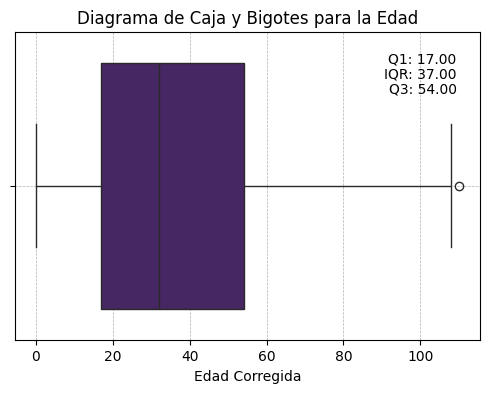

In [69]:
# Calculate quartiles
# Calculate the first quartile (Q1)
Q1 = merged_df["edad_correcta"].quantile(0.25)
# Calculate the third quartile (Q3)
Q3 = merged_df["edad_correcta"].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Create the box and whisker plot with the quartiles
sns.boxplot(x="edad_correcta", data=merged_df, palette=palette)
plt.title("Diagrama de Caja y Bigotes para la Edad")
plt.xlabel("Edad Corregida")

# Add quartile information as text annotations
plt.text(0.95, 0.9, f"Q1: {Q1:.2f}", transform=plt.gca().transAxes, ha="right")
plt.text(0.95, 0.85, f"IQR: {IQR:.2f}", transform=plt.gca().transAxes, ha="right")
plt.text(0.95, 0.8, f"Q3: {Q3:.2f}", transform=plt.gca().transAxes, ha="right")

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width
plt.show()

#### Top 10 Causas de Atención por Media de Días de Estancia (Más de 20 Observaciones Registradas).

In [70]:
# Group by 'causa_atencion' and calculate the mean and count of 'dias_estancia'
mean_days_cause = merged_df.groupby('causa_atencion')['dias_estancia'].agg(['mean', 'count', 'median'])

# Filter to include only causes with more than 20 cases
mean_days_cause = mean_days_cause[mean_days_cause['count'] > 20]

# Sort the mean values and select the top 10
top = mean_days_cause.sort_values(by='mean', ascending=False).head(10)

# Display the top 10 causes with mean days and count
top

,mean,count,median
causa_atencion,,,
D848,15.714286,21,7.0
D849,11.254237,59,8.0
C920,7.935841,2260,5.0
F319,7.540541,296,4.0
G122,7.500000,22,3.0
C260,7.392857,28,4.0
C699,7.391304,23,5.0
Z932,7.310345,58,4.0
I38X,7.304965,141,3.0


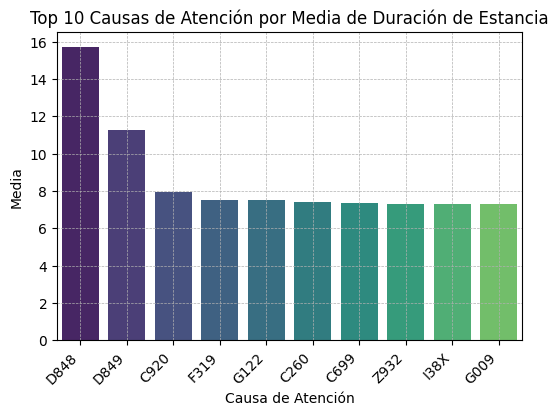

In [71]:
values = [15.714286, 11.254237, 7.935841, 7.540541, 7.5, 7.392857, 7.391304, 7.310345, 7.304965, 7.302326]
labels = ['D848', 'D849', 'C920', 'F319', 'G122', 'C260', 'C699', 'Z932', 'I38X', 'G009']

# Create bar plot using seaborn
sns.barplot(x=labels, y=values, palette=palette)

# Adding labels and title
plt.xlabel('Causa de Atención')
plt.ylabel('Media')
plt.title('Top 10 Causas de Atención por Media de Duración de Estancia')

# Rotating x labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

### Resultados de Análisis Exploratorio

De principio vemos que existen nueve columnas dentro del dataset. Estas columnas nos hablan sobre datos demográficos del usuario, y datos sobre su condición, tratamiento y cantidad de días dentro del hospital. Los datos están compuestos por 3 columnas numéricas  y 6 columnas con datos categóricos. Al explorar el tipo de dato que contiene cada columna, vemos que los datos no se encuentran limpios o de la mejor manera para trabajar, por lo que comenzamos realizando una pre-limpieza de datos.

La variable a de predecir contiene valores nulos. Se considera que estas filas u observaciones eran eliminadas debido a que, si se trata de hacer algún tipo de imputación, solo podrían generar ruido y, además de ser menos del 2.93 % de la base total, no se considera representativo.

Nuestra variable a predecir, días de estancia, tiene una cantidad del 7.80 % de datos que son atípicos. Aunque esta no es una gran cantidad, puede generar cierto ruido a la hora de realizar nuestro modelo. Leyendo más cuidadosamente el archivo de donde se obtiene la información de los datos, nos dice que cualquier valor mayor de 60 días de estancia no puede ser posible. Por lo que se truncarán los datos a 60 para todos los valores que sean mayores de 60, de esta manera reduciremos un poco los datos atípicos. 

Otra información que sale a la luz al observar nuestro gráfico de cajas y bigotes para nuestra variable de días de estancia, es que el 75% de los datos no pasa de estar más de 2 días en el hospital. 

## Ingeniería de Características (Primera Iteración)

La ingeniería de variables es fundamental para construir modelos predictivos. Se busca  predecir la cantidad de días que una persona estará en el hospital según la enfermedad y otras variables. Este proceso implica la creación y transformación de características relevantes a partir de tus datos brutos. Estas características adicionales pueden capturar mejor la complejidad de los datos y mejorar la capacidad predictiva del modelo.

### Categorización de las enfermedades

In [72]:
def mapCategory(icd_code):

    alpha = icd_code[0]
    num = 0
    
    try:
        num = int(icd_code[1:3])
    except:
        num = 99

    if alpha in ["A", "B"]:
        return "Certain infectious and parasitic diseases"
    elif alpha == "C" or (alpha == "D" and 49 >= num >= 0):
        return "Neoplasms"
    elif alpha == "D" and 89 >= num >= 50:
        return "Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism"
    elif alpha == "E":
        return "Endocrine, nutritional and metabolic diseases"
    elif alpha == "F":
        return "Mental, Behavioral and Neurodevelopmental disorders"
    elif alpha == "G":
        return "Diseases of the nervous system"
    elif alpha == "H" and 59 >= num >= 0:
        return "Diseases of the eye and adnexa"
    elif alpha == "H" and 95 >= num >= 60:
        return "Diseases of the ear and mastoid process"
    elif alpha == "I":
        return "Diseases of the circulatory system"
    elif alpha == "J":
        return "Diseases of the respiratory system"
    elif alpha == "K" and 95 >= num >= 0:
        return "Diseases of the digestive system"
    elif alpha == "L":
        return "Diseases of the skin and subcutaneous tissue"
    elif alpha == "M":
        return "Diseases of the musculoskeletal system and connective tissue"
    elif alpha == "N":
        return "Diseases of the genitourinary system"
    elif alpha == "O":
        return "Pregnancy, childbirth and the puerperium"
    elif alpha == "P" and 96 >= num >= 0:
        return "Certain conditions originating in the perinatal period"
    elif alpha == "Q":
        return "Congenital malformations, deformations and chromosomal abnormalities"
    elif alpha == "R":
        return "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified"
    elif alpha == "S" or (alpha == "T" and 88 >= num >= 0):
        return "Injury, poisoning and certain other consequences of external causes"
    elif alpha == "U" and 85 >= num >= 0:
        return "Codes for special purposes"
    elif alpha in "VWXY":
        return "External causes of morbidity"
    elif alpha == "Z":
        return "Factors influencing health status and contact with health services"
    else:
        return "Unknown"

# Apply mapping function to the causa_atencion column
merged_df["causa_categoria"] = merged_df["causa_atencion"].apply(mapCategory)

In [73]:
unique_categories = merged_df["causa_categoria"].unique()
print("Categorías únicas en la columna 'causa_categoria':")
print(len(unique_categories))

Categorías únicas en la columna 'causa_categoria':
22


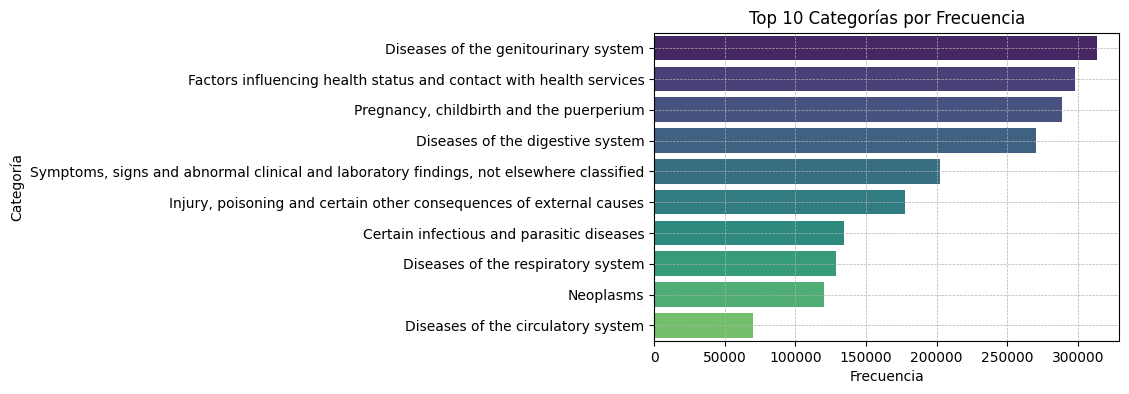

In [74]:
# Count the frequency of each category
category_frequency = merged_df["causa_categoria"].value_counts().head(10)

# Create the bar plot
sns.barplot(x=category_frequency.values, y=category_frequency.index, hue=category_frequency.index, legend=False, palette=palette)
plt.title("Top 10 Categorías por Frecuencia")
plt.xlabel("Frecuencia")
plt.ylabel("Categoría")

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

### Categorización de Edades

In [75]:
# Define the conditions for each age group
conditions = [
    (merged_df["edad_correcta"] >= 0) & (merged_df["edad_correcta"] <= 5),
    (merged_df["edad_correcta"] >= 6) & (merged_df["edad_correcta"] <= 11),
    (merged_df["edad_correcta"] >= 12) & (merged_df["edad_correcta"] <= 18),
    (merged_df["edad_correcta"] >= 19) & (merged_df["edad_correcta"] <= 26),
    (merged_df["edad_correcta"] >= 27) & (merged_df["edad_correcta"] <= 59),
    (merged_df["edad_correcta"] >= 60)
]

# Define the labels 
labels = ["Primera Infancia", "Segunda Infancia", "Adolescente", "Juventud", "Adulto", "Persona Mayor"]
merged_df["edad_categoria"] = pd.cut(merged_df["edad_correcta"], bins=[-1, 5, 11, 18, 26, 59, float("inf")], labels=labels)

random_sample = merged_df[["edad_correcta", "edad_categoria"]].sample(n=5)
print(random_sample.head())

         edad_correcta    edad_categoria
850379            23.0          Juventud
1045637           77.0     Persona Mayor
1630606           61.0     Persona Mayor
2145531           59.0            Adulto
1052958            3.0  Primera Infancia


### Regionalización

In [76]:
# Create a dictionary mapping each department to its corresponding region
department_to_region = {
    "Alta Verapaz": "Norte",
    "Baja Verapaz": "Central",
    "Chimaltenango": "Central",
    "Chiquimula": "Nororiente",
    "El Progreso": "Central",
    "Escuintla": "Sur",
    "Guatemala": "Central",
    "Huehuetenango": "Occidente",
    "Izabal": "Norte",
    "Jalapa": "Sur",
    "Jutiapa": "Sur",
    "Peten": "Norte",
    "Quetzaltenango": "Occidente",
    "Quiche": "Occidente",
    "Retalhuleu": "Sur",
    "Sacatepequez": "Central",
    "San Marcos": "Occidente",
    "Santa Rosa": "Sur",
    "Solola": "Occidente",
    "Suchitepequez": "Sur",
    "Totonicapan": "Occidente",
    "Zacapa": "Nororiente"
}

# Map each department to its corresponding region using the dictionary
merged_df["region"] = merged_df["departamento"].map(department_to_region)

# Display the DataFrame with the new "region" column
print(merged_df[["departamento", "region"]].head())

     departamento      region
0       Guatemala     Central
1          Zacapa  Nororiente
2  Quetzaltenango   Occidente
3  Quetzaltenango   Occidente
4  Quetzaltenango   Occidente


### Imputaciones, Datos Faltantes y Malas Columnas

#### Malas Columnas

Se eliminaran las siguientes columnas: ['periodo', 'mes', 'edad', 'tipo_edad']. La columna 'periodo' carece de relevancia para el aprendizaje del modelo, ya que solo contiene fechas, lo que podría llevar a conclusiones erróneas si se encuentra con un año no visto anteriormente. Esto solo introduciría ruido en nuestros datos.

De manera similar, la columna 'mes' carece de significado, ya que buscamos que el modelo comprenda patrones más amplios en lugar de variaciones mensuales específicas.

En cuanto a las columnas 'edad' y 'tipo_edad', contienen datos no corregidos. Una columna indica el valor y la otra la unidad, por lo que los transformarmos en una sola columna, edad_correcta. Por lo tanto, nos basamos en la columna corregida 'edad_correcta' para obtener información precisa sobre la edad.

In [77]:
# List of columns to drop
columns_to_drop = ["periodo", "mes", "edad", "tipo_edad"]
merged_df = merged_df.drop(columns_to_drop, axis=1)

In [78]:
pprint.pprint(merged_df.columns)

Index(['dias_estancia', 'sexo', 'grupo_etnico', 'departamento', 'municipio',
       'causa_atencion', 'tratamiento_recibido', 'edad_correcta',
       'causa_categoria', 'edad_categoria', 'region'],
      dtype='object')


#### Datos Faltantes

Eliminar las filas donde no hay valor en la columna de días de estancia es crucial para mantener la integridad de los datos, asegurar que el modelo se entrene correctamente. No existe sentido alguno mantener dichas filas si no tenemos el valor que queremos analizar. Al eliminarlas, se garantiza que el modelo se entrene con datos completos y válidos, lo que aumenta la confianza en sus resultados y su capacidad para generalizar a nuevos datos.

In [79]:
merged_df = merged_df.dropna(subset=['dias_estancia'])

#### Imputaciones

In [80]:
unique_categories = merged_df["grupo_etnico"].unique()
print("Categorías únicas en la columna 'causa_categoria':")
unique_categories

Categorías únicas en la columna 'causa_categoria':


['Ignorado', 'No indígena', 'Indígena', 'Mestizo, Ladino', 'Maya', 'Otro', 'Xinca', 'Garífuna']
Categories (8, object): ['Garífuna', 'Ignorado', 'Indígena', 'Maya', 'Mestizo, Ladino', 'No indígena', 'Otro', 'Xinca']

Al asignar un valor específico, como "Ignorado", a los valores nulos en lugar de realizar una imputación más compleja a la columna grupo_etnico, se está optando por una solución simple y directa. En este caso, alrededor del 30% de los valores en la variable son "Ignorado", lo que sugiere que la imputación podría ser problemática o innecesaria, no permitiendo una inferencia precisa de los valores faltantes.

Permanecer con esta etiqueta ("Ignorado") que representa a los valores nulos, sugiere una categoría neutral o genérica en el contexto de los datos; no se introduce ningún sesgo sustancial en el conjunto de datos. Esta estrategia resulta particularmente útil en este caso.

In [81]:
# Get a list of columns with null values
null_columns = merged_df.columns[merged_df.isnull().any()]

# Print columns with null values
if len(null_columns) > 0:
    print("Columns with null values:")
    for column in null_columns:
        print(column)
else:
    print("No columns with null values.")

Columns with null values:
sexo
departamento
municipio
tratamiento_recibido
edad_correcta
edad_categoria
region


In [82]:
print(merged_df.dtypes)

dias_estancia            float64
sexo                    category
grupo_etnico            category
departamento            category
municipio               category
causa_atencion          category
tratamiento_recibido    category
edad_correcta            float64
causa_categoria           object
edad_categoria          category
region                    object
dtype: object


Por otro lado, la elección de utilizar la moda para las variables categóricas y la mediana para las variables numéricas se basa en la naturaleza de los datos.

Para las columnas categóricas como "sexo", "departamento", "municipio", "tratamiento_recibido", "edad_categoria" y "region", sería apropiado utilizar la moda, ya que representa el valor más común en cada categoría y no se ve afectado por valores atípicos.

En cuanto a las columnas numéricas como "dias_estancia" y "edad_correcta", usaríamos la mediana. Esto se debe a que la mediana es más resistente a los valores atípicos, lo que garantiza una imputación más robusta

In [83]:
# Imputar valores nulos en columnas categóricas con la moda
categorical_columns = ["sexo", "departamento", "municipio", "tratamiento_recibido", "edad_categoria", "region"]
for column in categorical_columns:
    merged_df[column].fillna(merged_df[column].mode()[0], inplace=True)

# Imputar valores nulos en columnas numéricas con la mediana
merged_df["dias_estancia"].fillna(merged_df["dias_estancia"].median(), inplace=True)
merged_df["edad_correcta"].fillna(merged_df["edad_correcta"].median(), inplace=True)

# Imputar valores nulos en la columna 'causa_categoria' con una categoría especial
merged_df["causa_categoria"].fillna("Unknown", inplace=True)

### Generación de la Data

Para mayor comodidad de los miembros del grupo y de los lectores, se ha decidido separar la data de cada iteración en distintos archivos csv.

In [84]:
#merged_df.to_csv("los_data_gt_01.csv", index=False)

## Análisis Exploratorio (Segunda Iteración)

### Histograma de Dias Estancia Hospitalaria con Media y Mediana

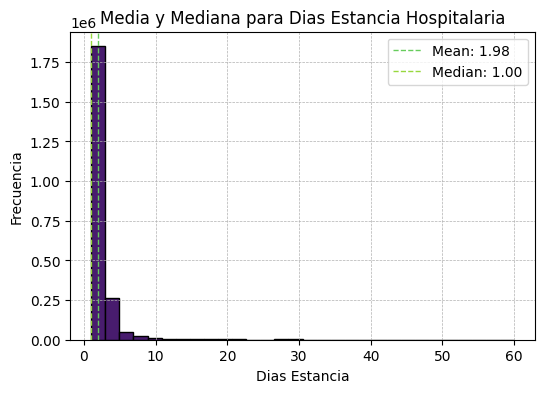

In [85]:
# Get the mean and median of the 'dias_estancia' column
mean_estancia = merged_df['dias_estancia'].mean()
median_estancia = merged_df['dias_estancia'].median()

# Plot histogram
plt.hist(merged_df['dias_estancia'], bins=30, color=palette[0], edgecolor='black')
plt.axvline(mean_estancia, color=palette[9], linestyle='dashed', linewidth=1, label=f'Mean: {mean_estancia:.2f}')
plt.axvline(median_estancia, color=palette[10], linestyle='dashed', linewidth=1, label=f'Median: {median_estancia:.2f}')
plt.xlabel('Dias Estancia')
plt.ylabel('Frecuencia')
plt.title('Media y Mediana para Dias Estancia Hospitalaria')
plt.legend()

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [86]:
# Filter the DataFrame to get rows where 'dias_estancia' is above 30
above_30 = merged_df[merged_df['dias_estancia'] > 30]

# Calculate the percentage of such rows
above_30 = (len(above_30) / len(merged_df)) * 100

print(f"The percentage of data where dias_estancia is above 30 is: {above_30:.2f}%")

The percentage of data where dias_estancia is above 30 is: 0.12%


### Evaluación de Datos Atípicos

In [87]:
# Filter the DataFrame to get rows where 'dias_estancia' is NOT above 30
merged_df = merged_df[merged_df['dias_estancia'] <= 30]

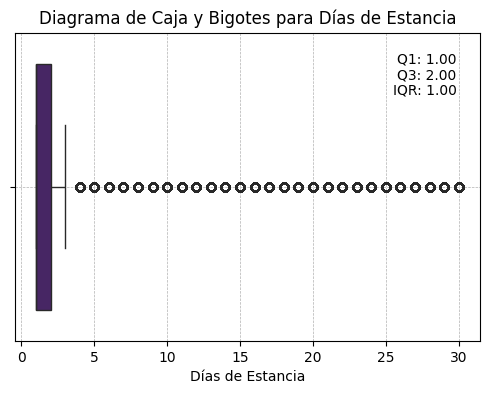

In [88]:
# Calculate quartiles
# Calculate the first quartile (Q1)
Q1 = merged_df["dias_estancia"].quantile(0.25)
# Calculate the third quartile (Q3)
Q3 = merged_df["dias_estancia"].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Create the box and whisker plot with quartiles
sns.boxplot(x="dias_estancia", data=merged_df, palette=palette)
plt.title("Diagrama de Caja y Bigotes para Días de Estancia")
plt.xlabel("Días de Estancia")

# Add quartile information as text annotations
plt.text(0.95, 0.9, f"Q1: {Q1:.2f}", transform=plt.gca().transAxes, ha="right")
plt.text(0.95, 0.8, f"IQR: {IQR:.2f}", transform=plt.gca().transAxes, ha="right")
plt.text(0.95, 0.85, f"Q3: {Q3:.2f}", transform=plt.gca().transAxes, ha="right")

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

plt.show()

### Porcentaje de Representación de Cada Región

In [89]:
# Group by 'region' and calculate the percentage each region represents
region_counts = merged_df['region'].value_counts(normalize=True) * 100

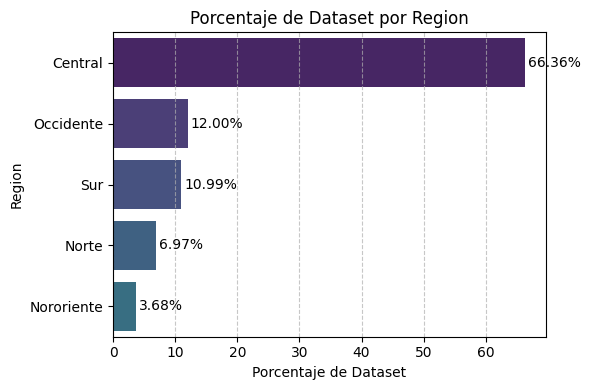

In [97]:
# Plot the percentages in a horizontal bar plot using Seaborn
sns.barplot(x=region_counts.values, y=region_counts.index, palette=palette)

# Annotate the values on the bars
for index, value in enumerate(region_counts):
    plt.text(value + 0.5, index, f'{value:.2f}%', ha='left', va='center', fontsize=10)

plt.xlabel('Porcentaje de Dataset')
plt.ylabel('Region')
plt.title('Porcentaje de Dataset por Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Limpieza

In [98]:
# Filter out the regions where region != 'Central'
merged_df = merged_df[merged_df['departamento'] == 'Guatemala']

In [99]:
merged_df

,dias_estancia,sexo,grupo_etnico,departamento,municipio,causa_atencion,tratamiento_recibido,edad_correcta,causa_categoria,edad_categoria,region
0,1.0,Hombre,Ignorado,Guatemala,San Juan Sacatepéquez,P95X,Médico,0.000000,Certain conditions originating in the perinata...,Primera Infancia,Central
5,2.0,Mujer,Ignorado,Guatemala,Guatemala,P95X,Médico,0.000000,Certain conditions originating in the perinata...,Primera Infancia,Central
12,1.0,Hombre,Ignorado,Guatemala,Guatemala,P95X,Médico,0.000000,Certain conditions originating in the perinata...,Primera Infancia,Central
13,1.0,Mujer,No indígena,Guatemala,Guatemala,P95X,Médico,0.000000,Certain conditions originating in the perinata...,Primera Infancia,Central
14,1.0,Hombre,No indígena,El progreso,Guastatoya,P95X,Médico,0.000000,Certain conditions originating in the perinata...,Primera Infancia,Central
...,...,...,...,...,...,...,...,...,...,...,...
2305434,1.0,Mujer,"Mestizo, Ladino",Extranjero,Extranjero,O829,Obstétrico,33.000000,"Pregnancy, childbirth and the puerperium",Adulto,Central
2305435,1.0,Mujer,"Mestizo, Ladino",Extranjero,Extranjero,O829,Obstétrico,34.000000,"Pregnancy, childbirth and the puerperium",Adulto,Central
2305436,2.0,Mujer,"Mestizo, Ladino",Extranjero,Extranjero,O829,Obstétrico,18.000000,"Pregnancy, childbirth and the puerperium",Adolescente,Central
2305448,3.0,Hombre,Maya,Guatemala,Guatemala,Z380,Médico,0.008219,Factors influencing health status and contact ...,Primera Infancia,Central


In [ ]:
# List of columns to drop
columns_to_drop = ["departamento", "municipio", "region"]
merged_df = merged_df.drop(columns_to_drop, axis=1)

# Fix types
merged_df["periodo"]                = merged_df["periodo"].astype(int)
merged_df["dias_estancia"]          = merged_df["dias_estancia"].astype(float)
merged_df["grupo_etnico"]           = merged_df["grupo_etnico"].astype("category")
merged_df["municipio"]              = merged_df["municipio"].astype("category")
merged_df["causa_atencion"]         = merged_df["causa_atencion"].astype("category")
merged_df["condicion_egreso"]       = merged_df["condicion_egreso"].astype("category")
merged_df["tratamiento_recibido"]   = merged_df["tratamiento_recibido"].astype("category")

merged_df.dtypes

## Ingeniería de Características (Segunda Iteración)